# Project Holly
Survey analysis. 

Many thanks to [Praveen Kumar Anwla](https://github.com/Praveen76/ANOVA-Test-COVID-19/blob/master/One%20Way%20ANOVA%20Test.ipynb) ([code](https://github.com/Praveen76/ANOVA-Test-COVID-19/blob/master/One%20Way%20ANOVA%20Test.ipynb)) for the ANOVA sample code and article.

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.stats.multicomp

%matplotlib inline

In [2]:
image_directory="images/"
image_extension="png"

def save_figure(fig, filename):
    filepath = image_directory + filename + "." + image_extension
    fig.savefig(filepath)
    
def increase_axes(chart):
    chart.set_xlabel(
        chart.get_xlabel(), 
        fontsize='large'
    )
    chart.set_ylabel(
        chart.get_ylabel(), 
        fontsize='large'
    )

def rotate_xlabels(chart):
    chart.set_xticklabels(
        chart.get_xticklabels(), 
        rotation=45, 
        horizontalalignment='right',
        fontweight='light'
    )
    
def create_countplot(data, x, save, order=None, ax=None, save_filename=None, hue=None, show_labels=False):
    if not ax:
        fig, ax = plt.subplots();
    
    if not save_filename:
        save_filename=x;
        
    chart = sns.countplot(ax=ax, data=data, x=x, order=order, hue=hue);
        
    rotate_xlabels(chart);
    increase_axes(chart);
    
    if show_labels:
        for p in ax.patches: 
            ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    
    if save:
        save_figure(chart.get_figure(), save_filename);
        plt.show()
    return chart;
    
def create_histogram(data, name, save, ax=None, save_filename=None, hue=None):
    if not ax:
        fig, ax = plt.subplots();
    if not save_filename:
        save_filename=x;


    chart = sns.histplot(ax=ax, data=data, hue=hue)
    increase_axes(chart);
    if save:
        save_figure(chart.get_figure(), save_filename)
        plt.show()
    return chart;

In [3]:
def anova_analysis(data, columns, variable, value):    
    data_combined = pd.melt(data[columns], var_name=variable, value_name=value)
    ols_string = value + ' ~ C(' + variable + ')';
    model = ols(ols_string, data_combined).fit()
    model.summary()

    # Seeing if the overall model is significant
    print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

    # Creates the ANOVA table
    display(sm.stats.anova_lm(model, typ= 2))

    #Post hoc test
    mc = statsmodels.stats.multicomp.MultiComparison(data_combined[value],data_combined[variable])
    mc_results = mc.tukeyhsd();
    print(mc_results);
    

In [4]:
sns.set(font_scale=1.1)
NO_YES = ["No", "Yes"]

# Data Preparation

In [5]:
survey_data = pd.read_csv("clean_survey_data.csv");
[n_rows, n_cols] = survey_data.shape # rows & columns
display(n_rows, n_cols)

122

45

In [6]:
display(survey_data.isnull().sum()) # display null values

Progress                                   0
Duration (in seconds)                      0
Finished                                   0
Age_Range                                  0
Gender                                     0
Degree                                     0
Income                                     0
Employment                                 0
Job_Type                                   0
Industry_Manufacturing                     0
Industry_Automobile                        0
Industry_Construction                      0
Technology_VR                              0
Technology_AR                              0
Technology_MR                              0
Used                                      21
Use_Cases                                 54
Use_Cases_Other                          122
Effective_Channel_LinkedIn                 0
Effective_Channel_FB_IG                    0
Effective_Channel_Google                   0
Effective_Channel_YouTube                  0
Effective_

In [7]:
# replace nulls with 0 in numeric fields
#replace_nulls_cols = ['Spend_Insurance', 'Spend_Food', 'Spend_Boarding', 'Spend_Grooming']
#survey_data[replace_nulls_cols] = survey_data[replace_nulls_cols].fillna(0)

# display(survey_data.isnull().sum()) # display missing values

# Visualize the Data

## Demographics
What is your age range? <br>
What is your gender? <br>
What is the highest degree you have completed? <br>
What is your household income? <br>
What is your employment status? <br>
What would you consider yourself? 

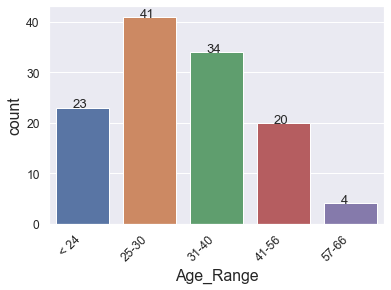

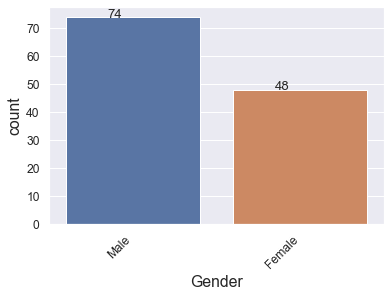

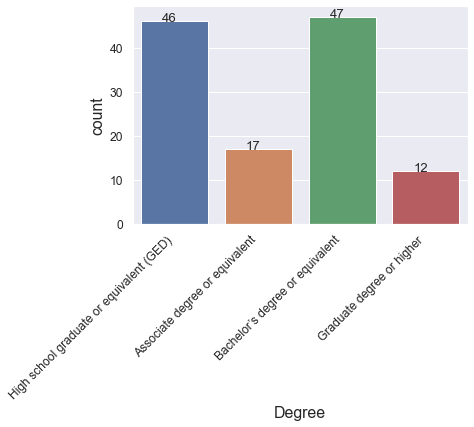

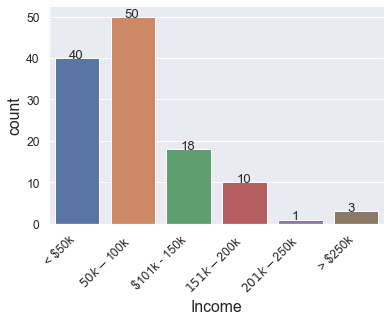

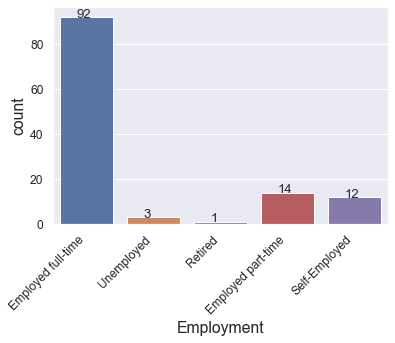

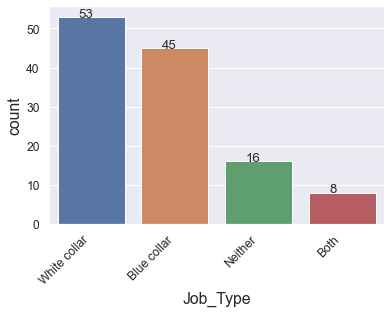

In [8]:
# Age_Range                                  0
# Gender                                     0
# Degree                                     0
# Income                                     0
# Employment                                 0
# Job_Type                                   0
order_age = ["< 24", "25-30", "31-40", "41-56", "57-66"]
create_countplot(survey_data, "Age_Range", True, order_age, show_labels=True);
create_countplot(survey_data, "Gender", True, show_labels=True);

order_degree = [
    'High school graduate or equivalent (GED)',
    'Associate degree or equivalent',
    'Bachelor’s degree or equivalent',
    'Graduate degree or higher'
        ]
create_countplot(survey_data, "Degree", True, order_degree, show_labels=True);

order_income = [
    '< $50k', 
    '$50k - $100k', 
    '$101k - 150k',   
    '$151k - $200k', 
    '$201k - $250k',
    '> $250k'
]
create_countplot(survey_data, "Income", True, order_income, show_labels=True);
create_countplot(survey_data, "Employment", True, show_labels=True);
create_countplot(survey_data, "Job_Type", True, show_labels=True);

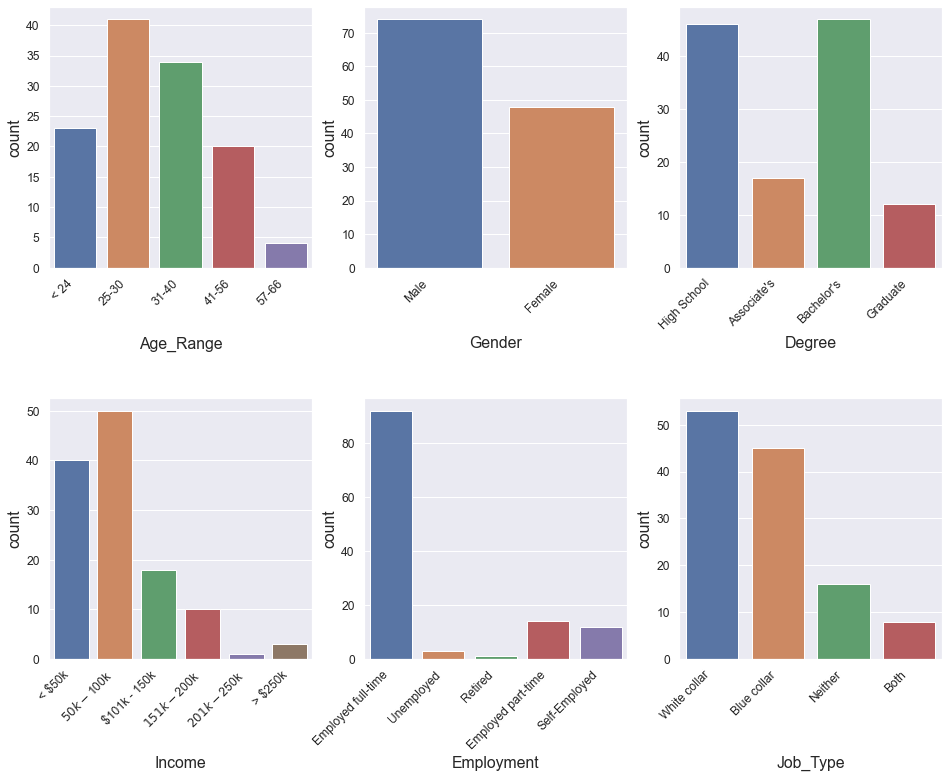

In [9]:
fig, axes = plt.subplots(2,3, figsize=(16,12));
create_countplot(survey_data, "Age_Range", False, order_age, ax=axes[0][0]);
create_countplot(survey_data, "Gender", False, ax=axes[0][1]);
chart = create_countplot(survey_data, "Degree", False, order_degree, ax=axes[0][2]);
axes[0][2].set_xticklabels(["High School", "Associate's", "Bachelor's", "Graduate"], rotation=45)
create_countplot(survey_data, "Income", False, order_income, ax=axes[1][0]);
create_countplot(survey_data, "Employment", False, ax=axes[1][1]);
create_countplot(survey_data, "Job_Type", False, ax=axes[1][2]);
fig.align_xlabels(axes)
fig.subplots_adjust(hspace=0.5)
save_figure(fig, 'Demographics');

## Participant Industries
Are you in the manufacturing industry? <br>
Are you in the automobile industry? <br>
Are you in the construction industry?

[44, 5, 31, 42]


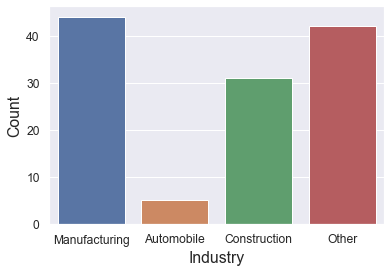

In [10]:
# Industry_Manufacturing                     0
# Industry_Automobile                        0
# Industry_Construction                      0
n_manufacturing = (survey_data["Industry_Manufacturing"]=="Yes").sum()
n_automotive = (survey_data["Industry_Automobile"]=="Yes").sum()
n_construction = (survey_data["Industry_Construction"]=="Yes").sum()
n_other = n_rows - n_manufacturing - n_automotive - n_construction

x = ["Manufacturing", "Automobile", "Construction", "Other"]
y = [n_manufacturing, n_automotive, n_construction, n_other]
print(y)

chart = sns.barplot(x=x, y=y)
chart.set_xlabel("Industry");
chart.set_ylabel("Count");
increase_axes(chart)
save_figure(chart.get_figure(), "Industry")

In [11]:
# create a column for hue
survey_data.loc[survey_data['Industry_Manufacturing'] == "Yes", 'Industry'] = 'Manufacturing'
survey_data.loc[survey_data['Industry_Automobile'] == "Yes", 'Industry'] = 'Automotive'
survey_data.loc[survey_data['Industry_Construction'] == "Yes", 'Industry'] = 'Construction'
survey_data['Industry'] = survey_data['Industry'].fillna('Other')

# an even simpler column
survey_data.loc[survey_data['Industry_Manufacturing'] == "Yes", 'Industry_Simple'] = 'MAC'
survey_data.loc[survey_data['Industry_Automobile'] == "Yes", 'Industry_Simple'] = 'MAC'
survey_data.loc[survey_data['Industry_Construction'] == "Yes", 'Industry_Simple'] = 'MAC'
survey_data['Industry_Simple'] = survey_data['Industry_Simple'].fillna('Other')

In [33]:
# delete the survey_data that is Other
display(survey_data.shape)
survey_data = survey_data[survey_data['Industry'] != 'Other']
display(survey_data.shape)
n_mac_participants, n_rows = survey_data.shape;

(75, 47)

(75, 47)

## Technologies Used
Rate how familiar you are with the following technology?

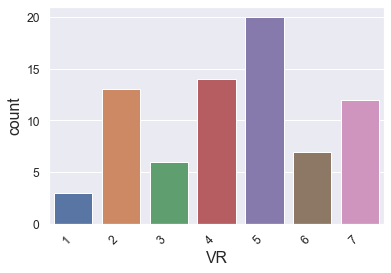

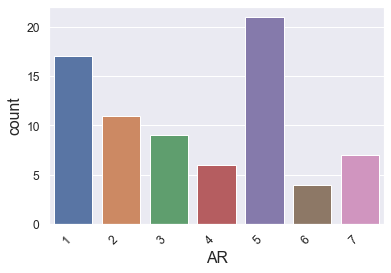

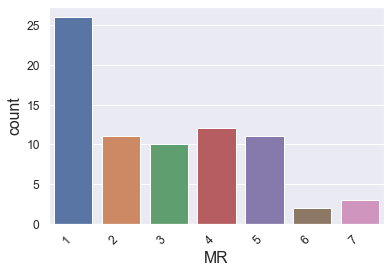

In [13]:
# Technology_VR                              0
# Technology_AR                              0
# Technology_MR                              0
technology = pd.DataFrame(columns=["VR", "AR", "MR"])
technology["VR"] = survey_data["Technology_VR"].replace(to_replace={
    '^1.*$': 1,
    '^2.*$': 2,
    '^3.*$': 3,
    '^4.*$': 4,
    '^5.*$': 5,
    '^6.*$': 6,
    '^7.*$': 7
}, regex=True)
create_countplot(technology, "VR", True);

technology["AR"] = survey_data["Technology_AR"].replace(to_replace={
    '^1.*$': 1,
    '^2.*$': 2,
    '^3.*$': 3,
    '^4.*$': 4,
    '^5.*$': 5,
    '^6.*$': 6,
    '^7.*$': 7
}, regex=True)
create_countplot(technology, "AR", True);

technology["MR"] = survey_data["Technology_MR"].replace(to_replace={
    '^1.*$': 1,
    '^2.*$': 2,
    '^3.*$': 3,
    '^4.*$': 4,
    '^5.*$': 5,
    '^6.*$': 6,
    '^7.*$': 7
}, regex=True)
create_countplot(technology, "MR", True);

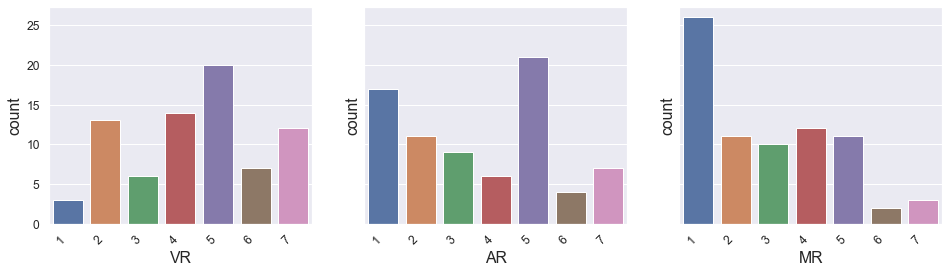

In [14]:
fig, axes = plt.subplots(1,3, figsize=(16,4), sharey=True);
order = list(range(1,8));
create_countplot(technology, "VR", False, ax=axes[0], order=order);
create_countplot(technology, "AR", False, ax=axes[1], order=order);
create_countplot(technology, "MR", False, ax=axes[2], order=order);
fig.align_xlabels(axes)
save_figure(chart.get_figure(), "Technologies")

,VR,AR,MR
count,75.000000,75.000000,75.000000
mean,4.386667,3.573333,2.853333
std,1.762165,1.987619,1.783508
min,1.000000,1.000000,1.000000
25%,3.000000,2.000000,1.000000
50%,5.000000,4.000000,3.000000
75%,5.500000,5.000000,4.000000
max,7.000000,7.000000,7.000000


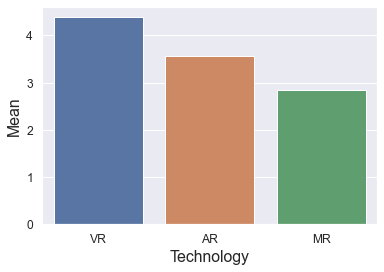

In [15]:
display(technology.describe());
means = technology.mean();

chart = sns.barplot(x=means.index, y=means);
chart.set_xlabel("Technology");
chart.set_ylabel("Mean");
increase_axes(chart)
save_figure(chart.get_figure(), "Technology_Means")

In [39]:
# one-sided p-test to see if users are moderately familiar
statistic, pvalue = stats.ttest_1samp(technology["VR"], 5.0, alternative='less')
print(f"statistic = {statistic}, pvalue = {pvalue}")

statistic, pvalue = stats.ttest_1samp(technology["AR"], 4.0, alternative='less')
print(f"statistic = {statistic}, pvalue = {pvalue}")

statistic, pvalue = stats.ttest_1samp(technology["MR"], 4.0, alternative='less')
print(f"statistic = {statistic}, pvalue = {pvalue}")

statistic = -3.014259561746796, pvalue = 0.0017634193395811208
statistic = -1.85902886593075, pvalue = 0.03349945726845918
statistic = -5.567916965221035, pvalue = 1.969305657785706e-07


In [17]:
variable = "Technology";
value = "Score"
columns = ["VR", "MR", "AR"]
anova_analysis(technology, columns, variable, value);

Overall model F( 2, 222) =  12.935, p =  0.0000


,sum_sq,df,F,PR(>F)
C(Technology),88.275556,2.0,12.935086,0.000005
Residual,757.520000,222.0,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    AR     MR    -0.72 0.0467 -1.4318 -0.0082   True
    AR     VR   0.8133 0.0206  0.1015  1.5251   True
    MR     VR   1.5333  0.001  0.8215  2.2451   True
----------------------------------------------------


## Used Channels
Have you used any of the following (Check all that applies):

Pokemon Go           58.666667
Smartphone VR        45.333333
AR / VR Glasses      40.000000
Tethered VR          32.000000
Standalone VR        17.333333
None of the Above    14.666667
dtype: float64

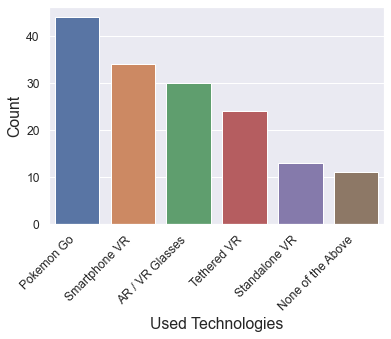

In [34]:
# Used                                      21
USED_GLASSES = "AR / VR Glasses"
USED_POKEMON = "Pokemon Go"
USED_TETHERED = "Tethered VR"
USED_STANDALONE = "Standalone VR"
USED_SMARTPHONE = "Smartphone VR"
USED_NONE = "None of the Above"

columns = [USED_POKEMON, USED_SMARTPHONE, USED_GLASSES, USED_TETHERED, 
          USED_STANDALONE, USED_NONE]
used_data = pd.DataFrame(columns=columns)
used_data[USED_GLASSES] = survey_data["Used"].str.contains(USED_GLASSES)
used_data[USED_POKEMON] = survey_data["Used"].str.contains(USED_POKEMON)
used_data[USED_TETHERED] = survey_data["Used"].str.contains(USED_TETHERED)
used_data[USED_STANDALONE] = survey_data["Used"].str.contains(USED_STANDALONE)
used_data[USED_SMARTPHONE] = survey_data["Used"].str.contains(USED_SMARTPHONE)
used_data[USED_NONE] = survey_data["Used"].str.contains("Not Applicable")
used_data[USED_NONE] = survey_data["Used"].fillna(True)

Used = used_data[used_data==True][columns].count();
chart = sns.barplot(y=Used.values, x=Used.index);
rotate_xlabels(chart)
chart.set_xlabel("Used Technologies");
chart.set_ylabel("Count");
increase_axes(chart)
save_figure(chart.get_figure(), 'Used');

display(Used/n_mac_participants*100)

## Use Cases
Thinking about your workplace, can you see any of the following technologies having potential use cases? (Check all the applies)

Virtual Reality      37.333333
Augmented Reality    36.000000
Mixed Reality        26.666667
None of the Above    41.333333
dtype: float64

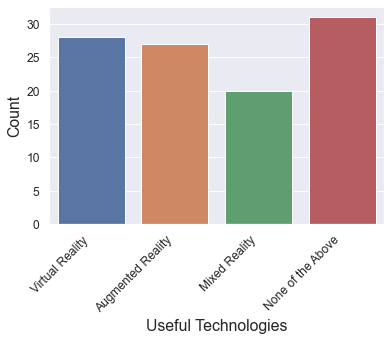

In [35]:
# Use_Cases                                 54
# Use_Cases_Other                          122
# There are no Use_Cases_Other
#display(survey_data["Use_Cases_Other"].unique())

USEFUL_VIRTUAL = "Virtual Reality"
USEFUL_AUGMENTED = "Augmented Reality"
USEFUL_MIXED = "Mixed Reality"
USEFUL_NONE = "None of the Above"

columns = [USEFUL_VIRTUAL, USEFUL_AUGMENTED, USEFUL_MIXED, USEFUL_NONE]
useful_data = pd.DataFrame(columns=columns)
useful_data[USEFUL_VIRTUAL] = survey_data["Use_Cases"].str.contains(USEFUL_VIRTUAL)
useful_data[USEFUL_AUGMENTED] = survey_data["Use_Cases"].str.contains(USEFUL_AUGMENTED)
useful_data[USEFUL_MIXED] = survey_data["Use_Cases"].str.contains(USEFUL_MIXED)
useful_data[USEFUL_NONE] = survey_data["Use_Cases"].str.contains("Not Applicable")
useful_data[USEFUL_NONE] = survey_data["Use_Cases"].fillna(True)

Useful = useful_data[useful_data==True][columns].count();
chart = sns.barplot(y=Useful.values, x=Useful.index);
rotate_xlabels(chart);
chart.set_xlabel("Useful Technologies");
chart.set_ylabel("Count");
increase_axes(chart);
save_figure(chart.get_figure(), 'Useful');

display(Useful/n_mac_participants*100)

statistic, pvalue = stats.ttest_1samp(technology["VR"], 5.0, alternative='less')
print(f"statistic = {statistic}, pvalue = {pvalue}")

statistic, pvalue = stats.ttest_1samp(technology["AR"], 4.0, alternative='less')
print(f"statistic = {statistic}, pvalue = {pvalue}")

statistic, pvalue = stats.ttest_1samp(technology["MR"], 4.0, alternative='less')
print(f"statistic = {statistic}, pvalue = {pvalue}")

## Effective Channels
If you are looking for certain products that could assist you in projects for your business/workplace, which of the following channels do you think would be most effective in finding you what you want: 

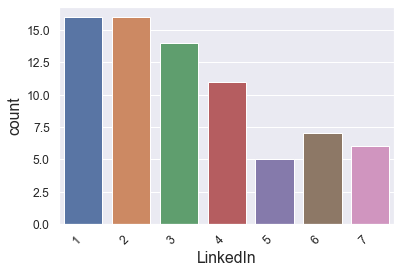

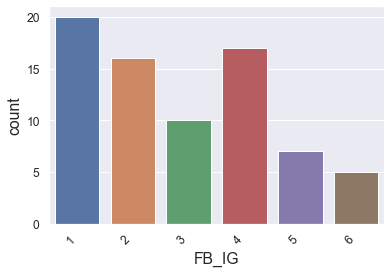

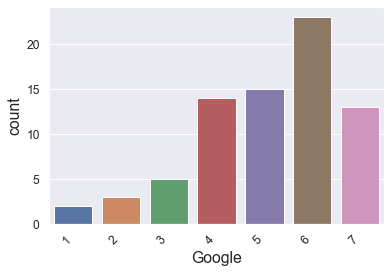

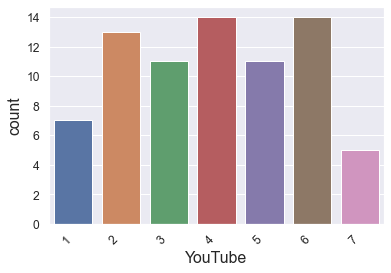

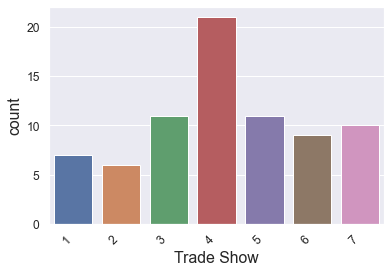

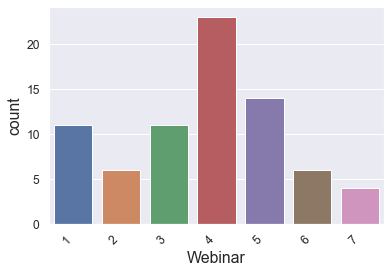

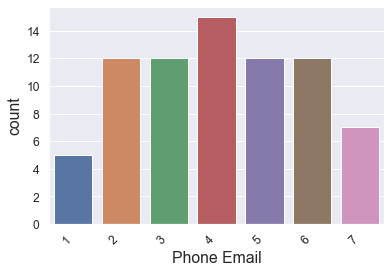

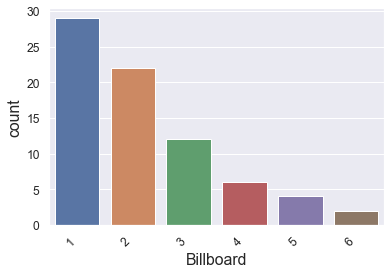

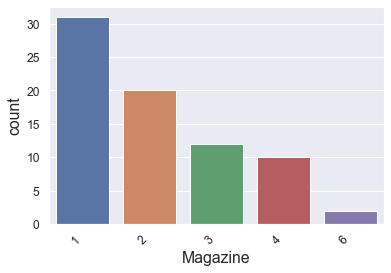

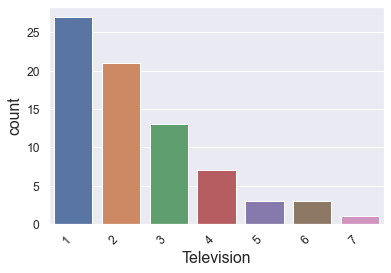

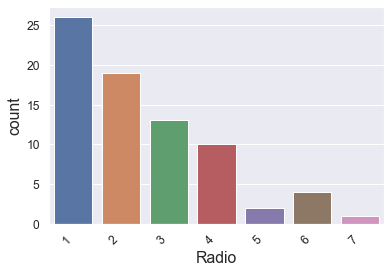

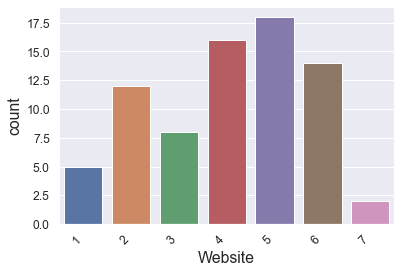

In [20]:
# Effective_Channel_LinkedIn                 0
# Effective_Channel_FB_IG                    0
# Effective_Channel_Google                   0
# Effective_Channel_YouTube                  0
# Effective_Channel_Trade_Show               0
# Effective_Channel_Webinar                  0
# Effective_Channel_Phone_Email              0
# Effective_Channel_Billboard                0
# Effective_Channel_Magazine                 0
# Effective_Channel_Television               0
# Effective_Channel_Radio                    0
# Effective_Channel_Website                  0
columns=["LinkedIn", "FB_IG", "Google", "YouTube", "Trade Show", "Webinar",
        "Phone Email","Billboard","Magazine","Television","Radio","Website"]
effective = pd.DataFrame(columns=columns)
effective["LinkedIn"] = survey_data["Effective_Channel_LinkedIn"].replace(to_replace={
    '1 - Not effective at all': 1,
    'Slightly effective': 2,
    'Moderately effective': 3,
    'Effective': 4,
    'Very Effective': 5,
    'Extremely effective': 6,
    '7 - Most Effective': 7
})
create_countplot(effective, "LinkedIn", True, save_filename="Effective_Channel_LinkedIn");

effective["FB_IG"] = survey_data["Effective_Channel_FB_IG"].replace(to_replace={
    '1 - Not effective at all': 1,
    'Slightly effective': 2,
    'Moderately effective': 3,
    'Effective': 4,
    'Very Effective': 5,
    'Extremely effective': 6,
    '7 - Most Effective': 7
})
create_countplot(effective, "FB_IG", True, save_filename="Effective_Channel_FB_IG");

effective["Google"] = survey_data["Effective_Channel_Google"].replace(to_replace={
    '1 - Not effective at all': 1,
    'Slightly effective': 2,
    'Moderately effective': 3,
    'Effective': 4,
    'Very Effective': 5,
    'Extremely effective': 6,
    '7 - Most Effective': 7
})
create_countplot(effective, "Google", True, save_filename="Effective_Channel_Google");

effective["YouTube"] = survey_data["Effective_Channel_YouTube"].replace(to_replace={
    '1 - Not effective at all': 1,
    'Slightly effective': 2,
    'Moderately effective': 3,
    'Effective': 4,
    'Very Effective': 5,
    'Extremely effective': 6,
    '7 - Most Effective': 7
})
create_countplot(effective, "YouTube", True, save_filename="Effective_Channel_YouTube");

effective["Trade Show"] = survey_data["Effective_Channel_Trade_Show"].replace(to_replace={
    '1 - Not effective at all': 1,
    'Slightly effective': 2,
    'Moderately effective': 3,
    'Effective': 4,
    'Very Effective': 5,
    'Extremely effective': 6,
    '7 - Most Effective': 7
})
create_countplot(effective, "Trade Show", True, save_filename="Effective_Channel_Trade_Show");

effective["Webinar"] = survey_data["Effective_Channel_Webinar"].replace(to_replace={
    '1 - Not effective at all': 1,
    'Slightly effective': 2,
    'Moderately effective': 3,
    'Effective': 4,
    'Very Effective': 5,
    'Extremely effective': 6,
    '7 - Most Effective': 7
})
create_countplot(effective, "Webinar", True, save_filename="Effective_Channel_Webinar");

effective["Phone Email"] = survey_data["Effective_Channel_Phone_Email"].replace(to_replace={
    '1 - Not effective at all': 1,
    'Slightly effective': 2,
    'Moderately effective': 3,
    'Effective': 4,
    'Very Effective': 5,
    'Extremely effective': 6,
    '7 - Most Effective': 7
})
create_countplot(effective, "Phone Email", True, save_filename="Effective_Channel_Phone_Email");

effective["Billboard"] = survey_data["Effective_Channel_Billboard"].replace(to_replace={
    '1 - Not effective at all': 1,
    'Slightly effective': 2,
    'Moderately effective': 3,
    'Effective': 4,
    'Very Effective': 5,
    'Extremely effective': 6,
    '7 - Most Effective': 7
})
create_countplot(effective, "Billboard", True, save_filename="Effective_Channel_Billboard");

effective["Magazine"] = survey_data["Effective_Channel_Magazine"].replace(to_replace={
    '1 - Not effective at all': 1,
    'Slightly effective': 2,
    'Moderately effective': 3,
    'Effective': 4,
    'Very Effective': 5,
    'Extremely effective': 6,
    '7 - Most Effective': 7
})
create_countplot(effective, "Magazine", True, save_filename="Effective_Channel_Magazine");

effective["Television"] = survey_data["Effective_Channel_Television"].replace(to_replace={
    '1 - Not effective at all': 1,
    'Slightly effective': 2,
    'Moderately effective': 3,
    'Effective': 4,
    'Very Effective': 5,
    'Extremely effective': 6,
    '7 - Most Effective': 7
})
create_countplot(effective, "Television", True, save_filename="Effective_Channel_Television");

effective["Radio"] = survey_data["Effective_Channel_Radio"].replace(to_replace={
    '1 - Not effective at all': 1,
    'Slightly effective': 2,
    'Moderately effective': 3,
    'Effective': 4,
    'Very Effective': 5,
    'Extremely effective': 6,
    '7 - Most Effective': 7
})
create_countplot(effective, "Radio", True, save_filename="Effective_Channel_Radio");

effective["Website"] = survey_data["Effective_Channel_Website"].replace(to_replace={
    '1 - Not effective at all': 1,
    'Slightly effective': 2,
    'Moderately effective': 3,
    'Effective': 4,
    'Very Effective': 5,
    'Extremely effective': 6,
    '7 - Most Effective': 7
})
create_countplot(effective, "Website", True, save_filename="Effective_Channel_Website");

,LinkedIn,FB_IG,Google,YouTube,Trade Show,Webinar,Phone Email,Billboard,Magazine,Television,Radio,Website
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.00000,75.000000,75.000000,75.000000
mean,3.240000,2.866667,5.106667,3.946667,4.200000,3.760000,4.080000,2.200000,2.12000,2.346667,2.453333,4.066667
std,1.894801,1.579714,1.502910,1.792577,1.770631,1.659046,1.753452,1.325427,1.24075,1.465765,1.518297,1.613569
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,4.000000,2.000000,3.000000,3.000000,3.000000,1.000000,1.00000,1.000000,1.000000,3.000000
50%,3.000000,3.000000,5.000000,4.000000,4.000000,4.000000,4.000000,2.000000,2.00000,2.000000,2.000000,4.000000
75%,4.000000,4.000000,6.000000,5.500000,5.500000,5.000000,5.500000,3.000000,3.00000,3.000000,3.000000,5.000000
max,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,6.00000,7.000000,7.000000,7.000000


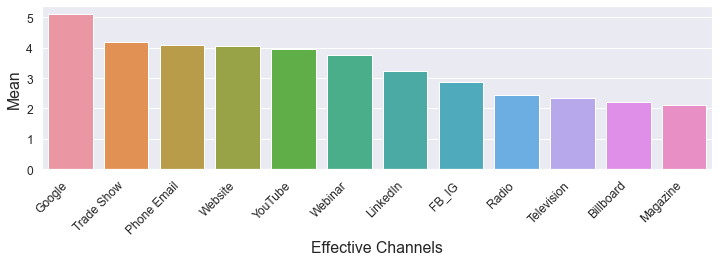

In [21]:
display(effective.describe());
means = effective.mean();
means_df = pd.DataFrame(columns=means.index).append(means, ignore_index=True)

fig = plt.figure(figsize=(12,3))
chart = sns.barplot(x=means_df.columns, y=means_df.values.flatten(), 
                    order=means_df.sort_values(by=0, axis=1, ascending=False));
chart.set_xlabel("Effective Channels");
chart.set_ylabel("Mean");
rotate_xlabels(chart)
increase_axes(chart)
save_figure(chart.get_figure(), "Effective_Channel_Means")

In [22]:
variable = "Effective";
value = "Score"
anova_analysis(effective, columns, variable, value);

Overall model F( 11, 888) =  27.211, p =  0.0000


,sum_sq,df,F,PR(>F)
C(Effective),770.092222,11.0,27.211046,3.263185e-49
Residual,2284.640000,888.0,NaN,NaN


     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
  Billboard       FB_IG   0.6667 0.3135 -0.1917   1.525  False
  Billboard      Google   2.9067  0.001  2.0483   3.765   True
  Billboard    LinkedIn     1.04 0.0044  0.1817  1.8983   True
  Billboard    Magazine    -0.08    0.9 -0.9383  0.7783  False
  Billboard Phone Email     1.88  0.001  1.0217  2.7383   True
  Billboard       Radio   0.2533    0.9  -0.605  1.1117  False
  Billboard  Television   0.1467    0.9 -0.7117   1.005  False
  Billboard  Trade Show      2.0  0.001  1.1417  2.8583   True
  Billboard     Webinar     1.56  0.001  0.7017  2.4183   True
  Billboard     Website   1.8667  0.001  1.0083   2.725   True
  Billboard     YouTube   1.7467  0.001  0.8883   2.605   True
      FB_IG      Google     2.24  0.001  1.3817  3.0983   True
      FB_IG    LinkedIn   0.3733    0.9  -0.485  1.2317

## Frequent Channels
If you are looking for certain products that could assist you in projects for your business/workplace, what platforms do you use most frequently when searching for products/solutions?

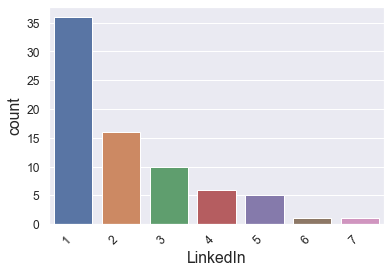

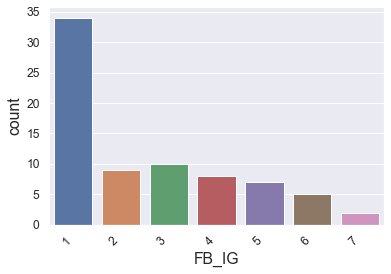

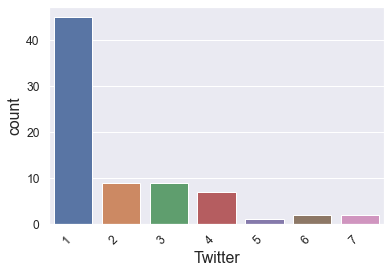

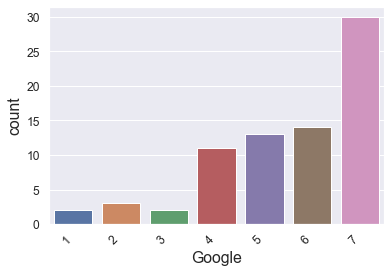

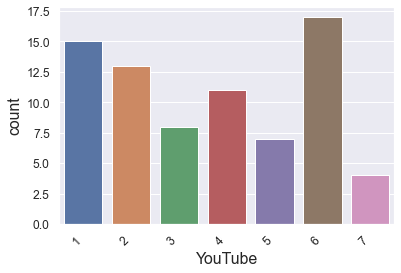

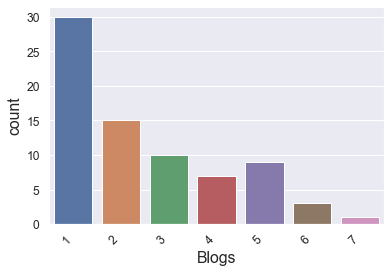

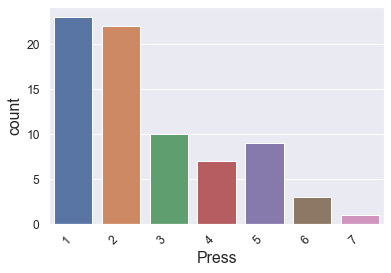

In [23]:
# Frequent_Channel_LinkedIn                  0
# Frequent_Channel__FB_IG                    0
# Frequent_Channel_Twitter                   0
# Frequent_Channel_Google                    0
# Frequent_Channel_YouTube                   0
# Frequent_Channel_Blogs                     0
# Frequent_Channel_Press                     0
columns=["LinkedIn", "FB_IG", "Twitter", "Google", "YouTube", "Blogs", "Press"]
frequent = pd.DataFrame(columns=columns)
frequent["LinkedIn"] = survey_data["Frequent_Channel_LinkedIn"].replace(to_replace={
    '1 - Not frequent at all': 1,
    'Slightly frequent': 2,
    'Moderately frequent': 3,
    'Frequent': 4,
    'Very frequent': 5,
    'Extremely frequent': 6,
    '7 - Most frequent': 7
})
create_countplot(frequent, "LinkedIn", True, save_filename="Frequent_Channel_LinkedIn");

frequent["FB_IG"] = survey_data["Frequent_Channel__FB_IG"].replace(to_replace={
    '1 - Not frequent at all': 1,
    'Slightly frequent': 2,
    'Moderately frequent': 3,
    'Frequent': 4,
    'Very frequent': 5,
    'Extremely frequent': 6,
    '7 - Most frequent': 7
})
create_countplot(frequent, "FB_IG", True, save_filename="Frequent_Channel__FB_IG");

frequent["Twitter"] = survey_data["Frequent_Channel_Twitter"].replace(to_replace={
    '1 - Not frequent at all': 1,
    'Slightly frequent': 2,
    'Moderately frequent': 3,
    'Frequent': 4,
    'Very frequent': 5,
    'Extremely frequent': 6,
    '7 - Most frequent': 7
})
create_countplot(frequent, "Twitter", True, save_filename="Frequent_Channel_Twitter");

frequent["Google"] = survey_data["Frequent_Channel_Google"].replace(to_replace={
    '1 - Not frequent at all': 1,
    'Slightly frequent': 2,
    'Moderately frequent': 3,
    'Frequent': 4,
    'Very frequent': 5,
    'Extremely frequent': 6,
    '7 - Most frequent': 7
})
create_countplot(frequent, "Google", True, save_filename="Frequent_Channel_Google");

frequent["YouTube"] = survey_data["Frequent_Channel_YouTube"].replace(to_replace={
    '1 - Not frequent at all': 1,
    'Slightly frequent': 2,
    'Moderately frequent': 3,
    'Frequent': 4,
    'Very frequent': 5,
    'Extremely frequent': 6,
    '7 - Most frequent': 7
})
create_countplot(frequent, "YouTube", True, save_filename="Frequent_Channel_YouTube");

frequent["Blogs"] = survey_data["Frequent_Channel_Blogs"].replace(to_replace={
    '1 - Not frequent at all': 1,
    'Slightly frequent': 2,
    'Moderately frequent': 3,
    'Frequent': 4,
    'Very frequent': 5,
    'Extremely frequent': 6,
    '7 - Most frequent': 7
})
create_countplot(frequent, "Blogs", True, save_filename="Frequent_Channel_Blogs");

frequent["Press"] = survey_data["Frequent_Channel_Press"].replace(to_replace={
    '1 - Not frequent at all': 1,
    'Slightly frequent': 2,
    'Moderately frequent': 3,
    'Frequent': 4,
    'Very frequent': 5,
    'Extremely frequent': 6,
    '7 - Most frequent': 7
})
create_countplot(frequent, "Press", True, save_filename="Frequent_Channel_Press");

,LinkedIn,FB_IG,Twitter,Google,YouTube,Blogs,Press
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,2.133333,2.573333,1.986667,5.560000,3.653333,2.506667,2.600000
std,1.445714,1.817136,1.528940,1.595941,2.003331,1.655240,1.593907
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,5.000000,2.000000,1.000000,1.000000
50%,2.000000,2.000000,1.000000,6.000000,4.000000,2.000000,2.000000
75%,3.000000,4.000000,3.000000,7.000000,6.000000,4.000000,4.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


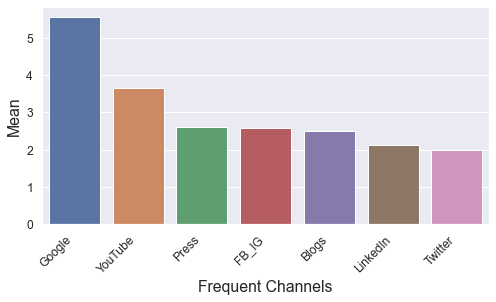

In [24]:
display(frequent.describe());
means = frequent.mean();
means_df = pd.DataFrame(columns=means.index).append(means, ignore_index=True)

fig = plt.figure(figsize=(8,4))
chart = sns.barplot(x=means_df.columns, y=means_df.values.flatten(), 
                    order=means_df.sort_values(by=0, axis=1, ascending=False));

chart.set_xlabel("Frequent Channels");
chart.set_ylabel("Mean");
rotate_xlabels(chart)
increase_axes(chart)
save_figure(chart.get_figure(), "Frequent_Channel_Means")

In [25]:
variable = "Frequent";
value = "Score"
anova_analysis(frequent, columns, variable, value);

Overall model F( 6, 518) =  41.776, p =  0.0000


,sum_sq,df,F,PR(>F)
C(Frequent),700.784762,6.0,41.776362,1.481429e-41
Residual,1448.213333,518.0,NaN,NaN


  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
   Blogs    FB_IG   0.0667    0.9 -0.7415  0.8749  False
   Blogs   Google   3.0533  0.001  2.2451  3.8615   True
   Blogs LinkedIn  -0.3733 0.7951 -1.1815  0.4349  False
   Blogs    Press   0.0933    0.9 -0.7149  0.9015  False
   Blogs  Twitter    -0.52 0.4793 -1.3282  0.2882  False
   Blogs  YouTube   1.1467  0.001  0.3385  1.9549   True
   FB_IG   Google   2.9867  0.001  2.1785  3.7949   True
   FB_IG LinkedIn    -0.44 0.6521 -1.2482  0.3682  False
   FB_IG    Press   0.0267    0.9 -0.7815  0.8349  False
   FB_IG  Twitter  -0.5867 0.3256 -1.3949  0.2215  False
   FB_IG  YouTube     1.08 0.0017  0.2718  1.8882   True
  Google LinkedIn  -3.4267  0.001 -4.2349 -2.6185   True
  Google    Press    -2.96  0.001 -3.7682 -2.1518   True
  Google  Twitter  -3.5733  0.001 -4.3815 -2.7651   True
  Google  YouTube  -1.9067  0.0

## Previous Channels
Have you used any of the following platforms previously to search for products/solutions for your business/workplace? (Check all that applies)

Google                89.333333
YouTube               53.333333
Facebook              33.333333
LinkedIn              30.666667
Press                 25.333333
Blog                  24.000000
Twitter               14.666667
Trade Publications     0.000000
None of the Above      4.000000
dtype: float64

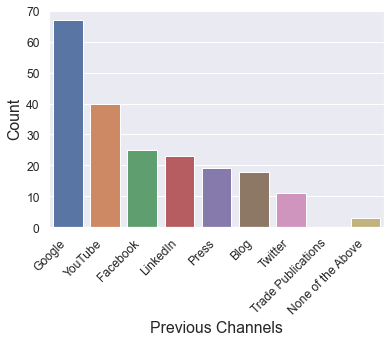

In [41]:
# Previous_Channel                           5
# Previous_Channel_Other                   120
#display(survey_data["Previous_Channel_Other"].unique())

PREVIOUS_LINKEDIN = "LinkedIn"
PREVIOUS_FB_IG = "Facebook"
PREVIOUS_TWITTER = "Twitter"
PREVIOUS_GOOGLE= "Google"
PREVIOUS_YOUTUBE = "YouTube"
PREVIOUS_BLOG = "Blog"
PREVIOUS_PRESS = "Press"
PREVIOUS_TRADE_PUBLICATIONS = "Trade Publications"
PREVIOUS_NONE = "None of the Above"

columns = [PREVIOUS_GOOGLE, PREVIOUS_YOUTUBE, PREVIOUS_FB_IG, PREVIOUS_LINKEDIN,  
           PREVIOUS_PRESS, PREVIOUS_BLOG, PREVIOUS_TWITTER, PREVIOUS_TRADE_PUBLICATIONS,
           PREVIOUS_NONE]
previous_data = pd.DataFrame(columns=columns)
previous_data[PREVIOUS_LINKEDIN] = survey_data["Previous_Channel"].str.contains(PREVIOUS_LINKEDIN)
previous_data[PREVIOUS_FB_IG] = survey_data["Previous_Channel"].str.contains(PREVIOUS_FB_IG)
previous_data[PREVIOUS_TWITTER] = survey_data["Previous_Channel"].str.contains(PREVIOUS_TWITTER)
previous_data[PREVIOUS_GOOGLE] = survey_data["Previous_Channel"].str.contains(PREVIOUS_GOOGLE)
previous_data[PREVIOUS_YOUTUBE] = survey_data["Previous_Channel"].str.contains(PREVIOUS_YOUTUBE)
previous_data[PREVIOUS_BLOG] = survey_data["Previous_Channel"].str.contains(PREVIOUS_BLOG)
previous_data[PREVIOUS_PRESS] = survey_data["Previous_Channel"].str.contains(PREVIOUS_PRESS)
previous_data[PREVIOUS_TRADE_PUBLICATIONS] = survey_data["Previous_Channel_Other"].str.contains(PREVIOUS_TRADE_PUBLICATIONS)
previous_data[PREVIOUS_NONE] = survey_data["Previous_Channel"].str.contains("None")
previous_data[PREVIOUS_NONE] = survey_data["Previous_Channel"].fillna(True)

Previous = previous_data[previous_data==True][columns].count();
chart = sns.barplot(y=Previous.values, x=Previous.index);
rotate_xlabels(chart);
chart.set_xlabel("Previous Channels");
chart.set_ylabel("Count");
increase_axes(chart);
save_figure(chart.get_figure(), 'Previous');

display(Previous/n_mac_participants*100)

## Acquisition Channels
When it comes to high tech or software products, which of the follow channels do you prefer to acquire the products from?

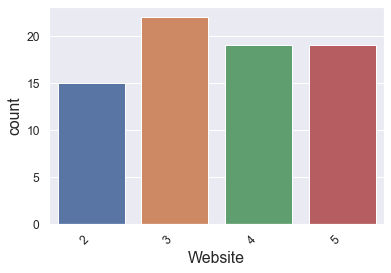

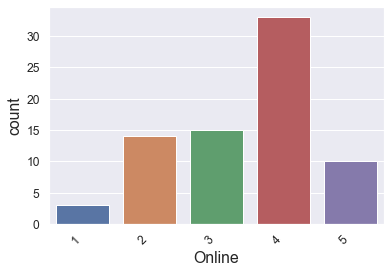

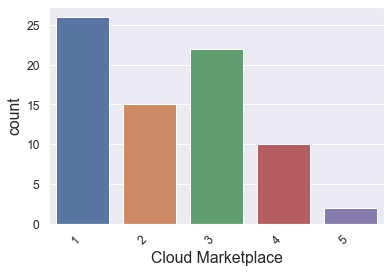

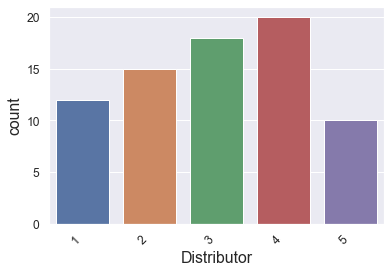

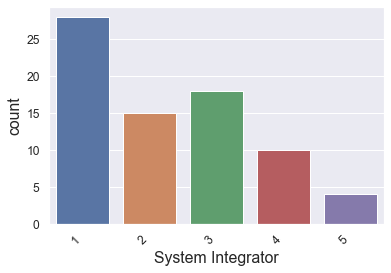

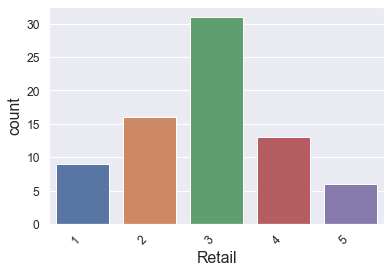

In [27]:
# Acquisition_Channel_Website                0
# Acquisition_Channel_Online                 0
# Acquisition_Channel_Cloud_Marketplace      0
# Acquisition_Channel_Distributor            0
# Acquisition_Channel_SI_Consultant          0
# Acquisition_Channel_Retail                 0

columns=["Website", "Online", "Cloud Marketplace", "Distributor", "System Integrator", "Retail"]
acquisition = pd.DataFrame(columns=columns)
acquisition["Website"] = survey_data["Acquisition_Channel_Website"].replace(to_replace={
    'Do not prefer': 1,
    'Prefer slightly': 2,
    'Prefer a moderate amount': 3,
    'Prefer a lot': 4,
    'Prefer a great deal': 5
})
create_countplot(acquisition, "Website", True, save_filename="Acquisition_Channel_Website");

acquisition["Online"] = survey_data["Acquisition_Channel_Online"].replace(to_replace={
    'Do not prefer': 1,
    'Prefer slightly': 2,
    'Prefer a moderate amount': 3,
    'Prefer a lot': 4,
    'Prefer a great deal': 5
})
create_countplot(acquisition, "Online", True, save_filename="Acquisition_Channel_Online");

acquisition["Cloud Marketplace"] = survey_data["Acquisition_Channel_Cloud_Marketplace"].replace(to_replace={
    'Do not prefer': 1,
    'Prefer slightly': 2,
    'Prefer a moderate amount': 3,
    'Prefer a lot': 4,
    'Prefer a great deal': 5
})
create_countplot(acquisition, "Cloud Marketplace", True, save_filename="Acquisition_Channel_Cloud_Marketplace");

acquisition["Distributor"] = survey_data["Acquisition_Channel_Distributor"].replace(to_replace={
    'Do not prefer': 1,
    'Prefer slightly': 2,
    'Prefer a moderate amount': 3,
    'Prefer a lot': 4,
    'Prefer a great deal': 5
})
create_countplot(acquisition, "Distributor", True, save_filename="Acquisition_Channel_Distributor");

acquisition["System Integrator"] = survey_data["Acquisition_Channel_SI_Consultant"].replace(to_replace={
    'Do not prefer': 1,
    'Prefer slightly': 2,
    'Prefer a moderate amount': 3,
    'Prefer a lot': 4,
    'Prefer a great deal': 5
})
create_countplot(acquisition, "System Integrator", True, save_filename="Acquisition_Channel_SI_Consultant");

acquisition["Retail"] = survey_data["Acquisition_Channel_Retail"].replace(to_replace={
    'Do not prefer': 1,
    'Prefer slightly': 2,
    'Prefer a moderate amount': 3,
    'Prefer a lot': 4,
    'Prefer a great deal': 5
})
create_countplot(acquisition, "Retail", True, save_filename="Acquisition_Channel_Retail");


,Website,Online,Cloud Marketplace,Distributor,System Integrator,Retail
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,3.560000,3.440000,2.293333,3.013333,2.293333,2.880000
std,1.081041,1.068467,1.159838,1.289179,1.249577,1.090004
min,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,1.000000,2.000000,1.000000,2.000000
50%,4.000000,4.000000,2.000000,3.000000,2.000000,3.000000
75%,4.500000,4.000000,3.000000,4.000000,3.000000,3.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


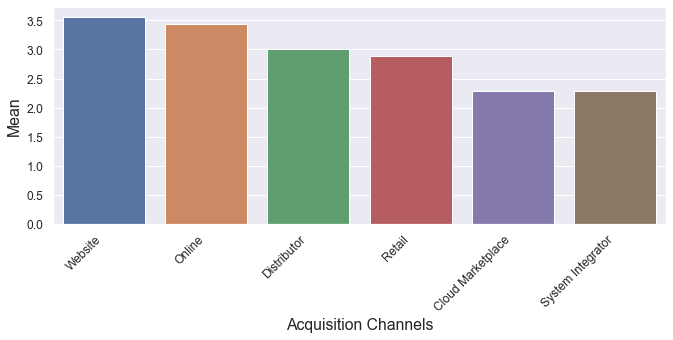

In [28]:
display(acquisition.describe());
means = acquisition.mean();
means_df = pd.DataFrame(columns=means.index).append(means, ignore_index=True)

fig = plt.figure(figsize=(11,4))
chart = sns.barplot(x=means_df.columns, y=means_df.values.flatten(), 
                    order=means_df.sort_values(by=0, axis=1, ascending=False));

chart.set_xlabel("Acquisition Channels");
chart.set_ylabel("Mean");
rotate_xlabels(chart)
increase_axes(chart)
save_figure(chart.get_figure(), "Acquisition_Channel_Means")

In [29]:
variable = "Channel";
value = "Score"
anova_analysis(acquisition, columns, variable, value);

Overall model F( 5, 444) =  16.461, p =  0.0000


,sum_sq,df,F,PR(>F)
C(Channel),110.66,5.0,16.461083,6.467199e-15
Residual,596.96,444.0,NaN,NaN


           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
      group1            group2      meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------
Cloud Marketplace       Distributor     0.72 0.0022   0.178   1.262   True
Cloud Marketplace            Online   1.1467  0.001  0.6047  1.6886   True
Cloud Marketplace            Retail   0.5867 0.0251  0.0447  1.1286   True
Cloud Marketplace System Integrator      0.0    0.9  -0.542   0.542  False
Cloud Marketplace           Website   1.2667  0.001  0.7247  1.8086   True
      Distributor            Online   0.4267 0.2158 -0.1153  0.9686  False
      Distributor            Retail  -0.1333    0.9 -0.6753  0.4086  False
      Distributor System Integrator    -0.72 0.0022  -1.262  -0.178   True
      Distributor           Website   0.5467 0.0467  0.0047  1.0886   True
           Online            Retail    -0.56 0.0382  -1.102  -0.018   True
           Online System 